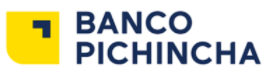

# Prueba práctica de conocimientos Data Engineer y Data Engineer Senior

### La prueba consta de 2 secciones:
### Sección 1: Temas de SQL:  Estos temas fueron elaborados en lenguaje SLQ Lite.
### Sección 2: Temas PySpark.

##Preparación ambientes SQL y Pyspark

******************************************************************************************
###  En la siguiente sección encontrará un texto que dice " A LA IZQUIERDA DE ESTA LINEA ENCONTRARÁ EL BOTÓN PLAY".  Debe dar clic en ese botón para que pueda configurar el ambiente de compilación.
###  Despuesde dar play, verifique que el codigo se haya ejecutado en su totalidad viendo los mensajes "3.38.2" y "CONFIGURACION DE AMBIENTE SQL y SPARK FINALIZADO"
******************************************************************************************

In [0]:
############## A LA IZQUIERA DE ESTA LINEA ENCONTRÁ EL BOTON PLAY ############## 
# Configurar ambiente Spark
print("INICIO CONFIGURACIÓN AMBIENTE SPARK")
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#########################################
### Reinicio automatico ambiente
print("INICIO CONFIGURACIÓN AMBIENTE SQL")
!curl https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release | tar xz
%cd sqlite/
!./configure
!make sqlite3.c
%cd /content
!npx degit coleifer/pysqlite3 -f
!cp sqlite/sqlite3.[ch] .
!python setup.py build_static build
!cp build/lib.linux-x86_64-3.7/pysqlite3/_sqlite3.cpython-37m-x86_64-linux-gnu.so \
     /usr/lib/python3.7/lib-dynload/
#######################################
print("CONFIGURACION DE AMBIENTE SQL y SPARK FINALIZADO")

INICIO CONFIGURACIÓN AMBIENTE SPARK
     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 47.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=eac6cf27ded88d1b20227eae4272ed14cf42cb90726f64ca27bdcb7853230e2e
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected packag

###  Ejecutar la siguiente sección, reiniciara el ambiente y saldra un mensaje de fallo de la sesión, pero es originado por el reinicio necesario para que la configuración tenga efecto

In [0]:
import os
os.kill(os.getpid(), 9)

### Ejecutar la siguiente sección. si todo  esta correctamente configurado el mensaje "3.38.2" debe aparecer

In [0]:
import sqlite3
print(sqlite3.sqlite_version)

3.38.2


# ----------------------------------------------------------------------------------------------------------

#Inicio prueba práctica

## Sección 1: SQL

###SQL: Antecedente -> Pregunta 1:

### Simulación de primera ronda Qatar 2022

Breve información de los datos disponibles:

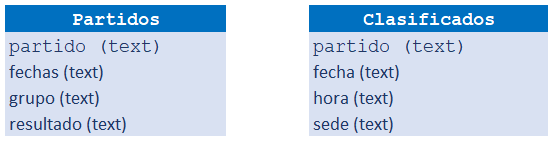

**Descripción:**

Se ha descargado de una página oficial dos sets de datos:

1.   Partidos.  Contiene información de la primera ronda de juegos a realizarse en el mundial de QATAR 2022 con una columna de resultado simulado por un algoritmo en etapa de pruebas.
2.   Clasificados. Contiene información de las fechas y sedes de la segunda ronda.  No se especifica los nombres de los equipos, únicamente una descripción de primer y segundo lugar dentro de cada grupo.
3.   Resultados_Qatar.  Es una tabla auxiliar que se utilizará los ejercicios 1 y 2.  Esta tabla contiene los resultados esperados luego de ejecutar el script desarrollado por usted en el ejercicio 3.



NOTA:  
* Tener en cuenta que al ser data descargada de un portal, el origen no tiene las características de una base de datos relacional.

* Podría existir problemas de calidad de los datos que debe resolver en el query.

* Sus consultas se ejecutan utilizando SQLite, por lo que debe ajustarse a las construcciones SQL admitidas por SQLite.

####Para cargar el set de datos por favor ejecutar la siguiente celda:

In [0]:
## Delete the tables if they already exist 

conn = sqlite3.connect('test.db')
print("Base de datos abierta con exito");

conn.execute('''drop table if exists Partidos;''')
conn.execute("create table Partidos(partido text, fechas text, grupo text, resultado text);")

conn.execute("insert into Partidos values('Qatar vs. Ecuador','21/11/2022','GRUPO A','0,1');")
conn.execute("insert into Partidos values('Senegal vs. Holanda','21/11/2022','GRUPO A','2,5');")
conn.execute("insert into Partidos values('Qatar vs. Senegal','25/11/2021','GRUPO A','0,5');")
conn.execute("insert into Partidos values('Holanda vs. Ecuador','25/11/2021','GRUPO A','3,3');")
conn.execute("insert into Partidos values('Holanda vs. Qatar','29/11/2021','GRUPO A','5,5');")
conn.execute("insert into Partidos values('Ecuador vs. Senegal','29/11/2021','GRUPO A','3,2');")
conn.execute("insert into Partidos values('Inglaterra vs. Irán','21/11/2022','GRUPO B','4,0');")
conn.execute("insert into Partidos values('Estados Unidos vs. Ucrania-Escocia-Gales','21/11/2022','GRUPO B','1,5');")
conn.execute("insert into Partidos values('Inglaterra vs. Estados Unidos','25/11/2021','GRUPO B','4,1');")
conn.execute("insert into Partidos values('Ucrania-Escocia-Gales vs. Iran','25/11/2021','GRUPO B','2,2');")
conn.execute("insert into Partidos values('Ucrania-Escocia-Gales vs. Inglaterra','29/11/2021','GRUPO B','0,1');")
conn.execute("insert into Partidos values('Irán vs. Estados Unidos','29/11/2021','GRUPO B','0,0');")
conn.execute("insert into Partidos values('Argentina vs. Arabia Saudi','22/11/2022','GRUPO C','5,1');")
conn.execute("insert into Partidos values('México vs. Polonia','22/11/2022','GRUPO C','1,5');")
conn.execute("insert into Partidos values('Argentina vs. México','26/11/2021','GRUPO C','3,0');")
conn.execute("insert into Partidos values('Polonia vs. Arabia Saudí','26/11/2021','GRUPO C','1,2');")
conn.execute("insert into Partidos values('Polonia vs. Argentina','30/11/2021','GRUPO C','2,4');")
conn.execute("insert into Partidos values('Arabia Saudí vs. México','30/11/2021','GRUPO C','5,5');")
conn.execute("insert into Partidos values('Francia vs. Peru-Australia-EAU','22/11/2022','GRUPO D','1,1');")
conn.execute("insert into Partidos values('Dinamarca vs. Túnez','22/11/2022','GRUPO D','5,2');")
conn.execute("insert into Partidos values('Francia vs. Dinamarca','26/11/2021','GRUPO D','0,0');")
conn.execute("insert into Partidos values('Túnez vs. Perú-Australia-EAU','26/11/2021','GRUPO D','0,5');")
conn.execute("insert into Partidos values('Túnez vs. Francia','30/11/2021','GRUPO D','4,0');")
conn.execute("insert into Partidos values('Perú-Australia-EAU vs. Dinamarca','30/11/2021','GRUPO D','0,0');")
conn.execute("insert into Partidos values('España vs. Costa Rica-Nueva Zelanda.','23/11/2022','GRUPO E','2,0');")
conn.execute("insert into Partidos values('Alemania vs. Japón','23/11/2022','GRUPO E','5,3');")
conn.execute("insert into Partidos values('España vs. Alemania','27/11/2021','GRUPO E','1,2');")
conn.execute("insert into Partidos values('Japón vs. Costa Rica-Nueva Zelanda','27/11/2021','GRUPO E','2,2');")
conn.execute("insert into Partidos values('Japón vs. Espana','01/12/2021','GRUPO E','2,1');")
conn.execute("insert into Partidos values('Costa Rica-Nueva Zelanda vs. Alemania','01/12/2021','GRUPO E','3,0');")
conn.execute("insert into Partidos values('Portugal vs. Ghana','24/11/2022','GRUPO F','2,1');")
conn.execute("insert into Partidos values('Uruguay vs. Corea del Sur','24/11/2022','GRUPO F','0,2');")
conn.execute("insert into Partidos values('Portugal vs. Uruguay','28/11/2021','GRUPO F','1,1');")
conn.execute("insert into Partidos values('Corea del Sur vs. Ghana','28/11/2021','GRUPO F','3,1');")
conn.execute("insert into Partidos values('Corea del Sur vs. Portugal.','02/12/2021','GRUPO F','4,5');")
conn.execute("insert into Partidos values('Ghana vs. Uruguay.','02/12/2021','GRUPO F','2,3');")

# Localidades y fecha de los partidos de la segunda ronda

conn.execute('''drop table if exists Clasificados;''')
conn.execute("create table Clasificados(partido text, fecha text, hora text, sede text);")

conn.execute("insert into Clasificados values('1º del grupo A vs. 2º del grupo B','03/12/2022','06:00:00 PM','Estadio Khalifa, Rayán');")
conn.execute("insert into Clasificados values('1º del grupo C vs. 2º del grupo D','03/12/2022','10:00:00 PM','Estadio Ahmed bin Ali, Rayán');")
conn.execute("insert into Clasificados values('1º del grupo D vs. 2º del grupo C','04/12/2022','06:00:00 PM','Estadio Al Thumama, Doha');")
conn.execute("insert into Clasificados values('1º del grupo B vs. 2º del grupo A','04/12/2022','10:00:00 PM','Estadio Al Bayt, Jor');")
conn.execute("insert into Clasificados values('1º del grupo E vs. 2º del grupo F','05/12/2022','06:00:00 PM','Estadio Al Janoub, Al Wakrah');")
conn.execute("insert into Clasificados values('1º del grupo G vs. 2º del grupo H','05/12/2022','10:00:00 PM','Estadio 974, Doha');")
conn.execute("insert into Clasificados values('1º del grupo F vs. 2º del grupo E','06/12/2022','06:00:00 PM','Estadio Qatar Foundation, Rayán');")
conn.execute("insert into Clasificados values('1º del grupo H vs. 2º del grupo G','06/12/2022','10:00:00 PM','Estadio Icónico, Lusail');")

# Totales obtenidos de la simulación por equipo

conn.execute('''drop table if exists Resultados_Qatar;''')
conn.execute("create table Resultados_Qatar(equipo text,grupo text, puntos int, gol_diferencia int);")

conn.execute("insert into Resultados_Qatar values('ALEMANIA','GRUPO E','6','0');")
conn.execute("insert into Resultados_Qatar values('ARABIA SAUDI','GRUPO C','4','-3');")
conn.execute("insert into Resultados_Qatar values('ARGENTINA','GRUPO C','9','9');")
conn.execute("insert into Resultados_Qatar values('COREA DEL SUR','GRUPO F','6','3');")
conn.execute("insert into Resultados_Qatar values('COSTA RICA-NUEVA ZELANDA','GRUPO E','4','1');")
conn.execute("insert into Resultados_Qatar values('DINAMARCA','GRUPO D','5','3');")
conn.execute("insert into Resultados_Qatar values('ECUADOR','GRUPO A','7','2');")
conn.execute("insert into Resultados_Qatar values('ESPANA','GRUPO E','3','0');")
conn.execute("insert into Resultados_Qatar values('ESTADOS UNIDOS','GRUPO B','1','-7');")
conn.execute("insert into Resultados_Qatar values('FRANCIA','GRUPO D','2','-4');")
conn.execute("insert into Resultados_Qatar values('GHANA','GRUPO F','0','-4');")
conn.execute("insert into Resultados_Qatar values('HOLANDA','GRUPO A','5','3');")
conn.execute("insert into Resultados_Qatar values('INGLATERRA','GRUPO B','9','8');")
conn.execute("insert into Resultados_Qatar values('IRAN','GRUPO B','2','-4');")
conn.execute("insert into Resultados_Qatar values('JAPON','GRUPO E','4','-1');")
conn.execute("insert into Resultados_Qatar values('MEXICO','GRUPO C','1','-7');")
conn.execute("insert into Resultados_Qatar values('PERU-AUSTRALIA-EAU','GRUPO D','5','5');")
conn.execute("insert into Resultados_Qatar values('POLONIA','GRUPO C','3','1');")
conn.execute("insert into Resultados_Qatar values('PORTUGAL','GRUPO F','7','2');")
conn.execute("insert into Resultados_Qatar values('QATAR','GRUPO A','1','-6');")
conn.execute("insert into Resultados_Qatar values('SENEGAL','GRUPO A','3','1');")
conn.execute("insert into Resultados_Qatar values('TUNEZ','GRUPO D','3','-4');")
conn.execute("insert into Resultados_Qatar values('UCRANIA-ESCOCIA-GALES','GRUPO B','4','3');")
conn.execute("insert into Resultados_Qatar values('URUGUAY','GRUPO F','4','-1');")

conn.commit()
print("Valores insertados con éxito");




Base de datos abierta con exito
Valores insertados con éxito


####SQL: Pregunta 1 (Dificultad baja *): 

Hemos cargado una tabla auxiliar con los resultados esperados de la Pregunta 3. La tabla se llama: "Resultados_Qatar" y tiene la siguiente estructura: (equipo, GRUPO, puntos, gol_diferencia).   Los campos "puntos" y "gol_diferencia" tienen los totales acumulados al final de todos los juegos en la primera ronda según una simulación realizada.

La FIFA ha decidido que los "Equipos Élite", clasificarán automáticamente al siguiente mundial.  

*Equipos Élite: Aquellos equipos que se encuentren en el quintil mas alto a nivel de puntos acumulados.

<b>PEDIDOS

  1.1.   Realizar una consulta que permita identificar los equipos que clasificarán al siguiente mundial de forma automática.

<b>
------------------------------------------------------
  
FUENTE:  Se recomienda utilizar la tabla "Resultados_Qatar".

In [0]:
# Ejercicio # 1
conn = sqlite3.connect('test.db')

####PROGRAME SU RESPUESTA DENTRO DEL CONN.EXECUTE ENTRE LAS COMILLAS

cursor = conn.execute('''

                      

                      ;''')
for row in cursor:
  print(row)
conn.close()

####SQL: Pregunta 2 (Dificultad media **): 
<b>PEDIDOS:


2.1.   Determinar los 2 equipos con mayor puntaje que pasarán a la siguiente ronda por cada grupo.  En caso de que existan mas de dos equipos con derecho a pasar por tener igual número de puntos, se definirá quien pasa considerando el que tenga el mayor gol diferencia.

2.2.   Agregar un campo indicando en qué ciudad y Fecha/hora que jugarán en la siguiente ronda los equipos clasificados.

------------------------------------------------------
<b> FUENTES RECOMENDADAS:  
 

*   Tabla "Resultados_Qatar" que contiene los resultados por equipo.
*   Tabla "Clasificados" para concer las localidades

In [0]:
# Ejercicio # 2.1
conn = sqlite3.connect('test.db')

####PROGRAME SU RESPUESTA DENTRO DEL CONN.EXECUTE ENTRE LAS COMILLAS

cursor = conn.execute('''
                       
                       ''')

for row in cursor:
  print(row)
conn.close()

In [0]:
# Ejercicio # 2.2
conn = sqlite3.connect('test.db')

####PROGRAME SU RESPUESTA DENTRO DEL CONN.EXECUTE ENTRE LAS COMILLAS

cursor = conn.execute('''
                       
                       ''')

for row in cursor:
  print(row)
conn.close()

####SQL: Pregunta 3 (Dificultad media alta ***):  

Se ha realizado una simulación de la primera ronda de partidos en el mundial de QATAR 2022, cuyos resultados por partido se han almacenado en la tabla "Partidos".  Mediante un proceso manual en Excel se elaboró el siguiente resumen: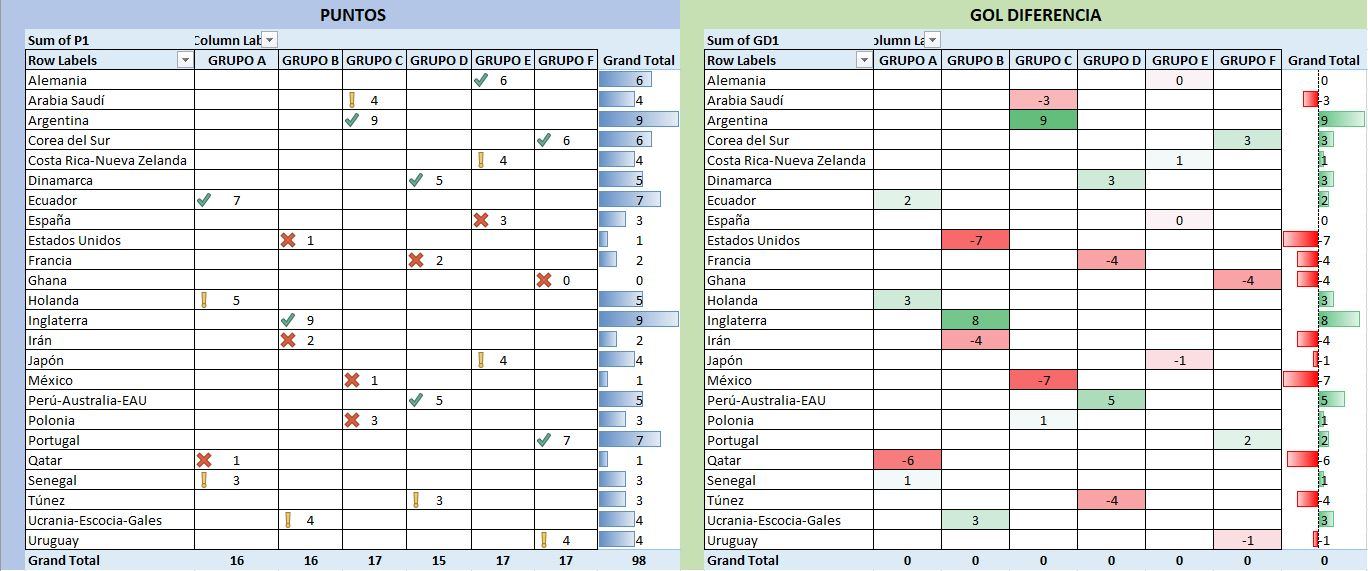

<b> PEDIDO:  
  
Se solicita automatizar el cálculo manual realizado anteriormente de tal forma que permita obtener la siguiente información:  Equipo, Grupo al que pertenece, Total Puntos Obtenidos en todos los partidos y Sumatoria del Gol Diferencia logrado en cada partido.

--------------------------------------------
<b>Reglas para asignación de Puntos:
--------------------------------------------
  * Si gana un partido obtendrá 3 puntos.
  * Si pierde un partido obtendrá 0 puntos.
  * Si empata un partido obtendrá 1 punto.
----------------------------------------------------------------
<b>Gol Diferencia:
----------------------------------------------------------------
  * Sumatoria del total de número de goles anotados menos número de goles recibidos.

-------------------------------------------
Fuente:  Tabla "Partidos"

In [0]:
# Ejercicio # 3
conn = sqlite3.connect('test.db')


####PROGRAME SU RESPUESTA DENTRO DEL CONN.EXECUTE ENTRE LAS COMILLAS

cursor = conn.execute('''


                       ''') 

for row in cursor:
  print(row)
conn.close()

####SQL: Pregunta 4 (Dificultad media **):  

Se le ha solicitado construir una solución que permita recibir Logs de transacciones bancarias con las siguientes consideraciones:

•	Columnas del log transaccional:

####CAMPOS

CODIGO_TRANSACCION

ID_SESION

GUID

FECHA_TRANSACCION

IDENTIFICACION_ORDENANTE

NOMBRE_ORDENANTE

IDENTIFICACION_BENEFICIARIO

NOMBRE_BENEFICIARIO

CAMPO_ELASTICO

#### ENTREGABLES:
1. Script de creación de la tabla.
2. Script de un SP de depuración que será ejecutado el primero de cada mes con la finalidad de conservar únicamente la información de los 2 ùltimos meses. Ejm. La ejecuciòn del 1 de enero 2023, dejará datos únicamente de noviembre 2022 y diciembre 2022.  Borrando datos de octubre 2022.
3. Pregunta:  Describa una estrategia para controlar cambios en la fuente anteriores a la fecha habitual de carga.

In [0]:
# Ejercicio # 4.1
conn = sqlite3.connect('test.db')


####PROGRAME SU RESPUESTA DENTRO DEL CONN.EXECUTE ENTRE LAS COMILLAS

cursor = conn.execute('''


                       ''') 

for row in cursor:
  print(row)
conn.close()

In [0]:
# Ejercicio # 4.2
conn = sqlite3.connect('test.db')


####PROGRAME SU RESPUESTA DENTRO DEL CONN.EXECUTE ENTRE LAS COMILLAS

cursor = conn.execute('''


                       ''') 

for row in cursor:
  print(row)
conn.close()

In [0]:
# Pregunta # 4.3

# Respuesta:
#
#
#
#
#
#
#
#


##Sección 5: Pyspark

####PySpark: Pregunta 5 (Dificultad baja *): 

Se cuenta con dos listas que contienen información de los jugadores de fútbol mejor rankeados a nivel mundial y otra lista con el catálogo de países al que pertenecen.

<b> PEDIDOS:

<b> 5.1  Crear dos dataframes en función de las listas entregadas.

<b> 5.2. Consolidar los datos y crear una marca que permita identificar el mejor jugador rankeado por país.
  

<b> 5.3 Exportar el resultado del ejercicio anterior en tres formatos:
1. parquet
2. json
3. csv (separado por caracter '|' y conservando la cabecera de la data)

Los tres archivos deberán crearse en la ruta /tmp

<b> 5.4.  Qué formato utilizaría para almacenar y procesar grandes volúmenes de datos en Databricks?  Justifique porqué no seleccionó los otros dos formatos.

<b>Nota:  Desarrolle su análisis en el espacio comentado

In [0]:
# Ejercicio 6 Pyspark

import sys
from pyspark.mllib.random import RandomRDDs
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

# esquema de jugador: [(ranking, nombre, codigo_pais, numero_goles, numero_partidos_jugados)]
jugador = [("1", "Cristiano Ronaldo", "32", "115", "184"),("2", "Ali Daei", "24", "109", "148"),("3", "Mokhtar Dahari", "28", "89", "142"),("4", "Ferenc Puskás", "20", "84", "89"),("5", "Lionel Messi", "5", "81", "158"),("6", "Sunil Chhetri", "21", "80", "125"),("7", "Ali Mabkhout", "13", "79", "104"),("8", "Godfrey Chitalu", "39", "79", "111"),("9", "Hussein Saeed", "23", "78", "137"),("10", "Pelé", "8", "77", "92"),("11", "Sándor Kocsis", "19", "75", "68"),("12", "Kunishige Kamamoto", "26", "75", "76"),("13", "Bashar Abdullah", "27", "75", "134"),("14", "Robert Lewandowski", "31", "74", "128"),("15", "Majed Abdullah", "4", "72", "117"),("16", "Kinnah Phiri", "29", "71", "117"),("17", "Kiatisuk Senamuang", "36", "71", "134"),("18", "Miroslav Klose", "1", "71", "137"),("19", "Piyapong Pue-on", "36", "70", "100"),("20", "Abdul Kadir", "22", "70", "111"),("21", "Stern John", "37", "70", "115"),("22", "Neymar", "8", "70", "116"),("23", "Gerd Müller", "2", "68", "62"),("24", "Romelu Lukaku", "6", "68", "101"),("25", "Carlos Ruiz Gutiérrez", "17", "68", "133"),("26", "Robbie Keane", "25", "68", "146"),("27", "Hossam Hassan", "12", "68", "176"),("28", "Luis Suárez", "38", "67", "130"),("29", "Didier Drogba", "11", "65", "105"),("30", "Jasem Al-Huwaidi", "27", "63", "83"),("31", "Ronaldo Nazario", "8", "62", "98"),("32", "Zlatan Ibrahimović", "35", "62", "120"),("33", "Ahmed Radhi", "23", "62", "121"),("34", "Abdul Ghani Minhat", "16", "61", "71"),("35", "Edin Džeko", "7", "60", "118"),("36", "Imre Schlosser", "19", "59", "68"),("37", "David Villa", "14", "59", "98"),("38", "Cha Bum-Kun", "10", "58", "135"),("39", "Ali Ashfaq", "30", "57", "89"),("40", "Carlos Pavón", "18", "57", "101"),("41", "Clint Dempsey", "15", "57", "141"),("42", "Younis Mahmoud", "23", "57", "148"),("43", "Landon Donovan", "15", "57", "157"),("44", "Samuel Eto'o", "9", "56", "118"),("45", "Romário", "8", "55", "70"),("46", "Kazuyoshi Miura", "26", "55", "89"),("47", "Jan Koller", "33", "55", "91"),("48", "Iswadi Idris", "22", "55", "97"),("49", "Fandi Ahmad", "34", "55", "101"),("50", "Joachim Streich", "3", "55", "102")]

# esquema de país: [(codigo_pais, nombre_pais)]
pais = [("1", " Alemania"),("2", " Alemania Federal"),("3", " Alemania Oriental"),("4", " Arabia Saudita"),("5", " Argentina"),("6", " Bélgica"),("7", " Bosnia y Herzegovina"),("8", " Brasil"),("9", " Camerún"),("10", " Corea del Sur"),("11", " Costa de Marfil"),("12", " Egipto"),("13", " Emiratos Arabes Unidos"),("14", " España"),("15", " Estados Unidos"),("16", " Federación Malaya/ Malasia"),("17", " Guatemala"),("18", " Honduras"),("19", " Hungría"),("20", " Hungría/ España"),("21", " India"),("22", " Indonesia"),("23", " Irak"),("24", " Irán"),("25", " Irlanda"),("26", " Japón"),("27", " Kuwait"),("28", " Malasia"),("29", " Malawi"),("30", " Maldivas"),("31", " Polonia"),("32", " Portugal"),("33", " República Checa"),("34", " Singapur"),("35", " Suecia"),("36", " Tailandia"),("37", " Trinidad y Tobago"),("38", " Uruguay"),("39", " Zambia")]

####### PROGRAME SU RESPUESTA AQUI ##############

# Respuesta 6.1
# ===============================================


# Respuesta 6.2
# ===============================================


# Respuesta 6.3
# ===============================================


# Respuesta 6.4
# ===============================================


# Justificación 6.4
#
#
#
#################################################

spark.stop()